In [1]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import statsmodels.api as sm

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
file_id = 'https://docs.google.com/spreadsheets/d/1sbdq5Ns4-cVz6ve8aU6HBpQvAT1IUtl4/edit?usp=sharing&ouid=113544346438304110369&rtpof=true&sd=true'  # Replace with your actual file ID
file_path = f'/content/gdrive/MyDrive/Finance project Python/Generic 1st CL future.xlsx'  # Replace with your actual file ID


df = pd.read_excel(file_path)

In [4]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming the time series column is named 'data'
time_series = df['Mid Price']

# Fit ARMA model
model = ARIMA(time_series, order=(2, 1, 2))
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:              Mid Price   No. Observations:                 2740
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -10224.515
Date:                Tue, 27 Jun 2023   AIC                          20459.030
Time:                        10:57:47   BIC                          20488.607
Sample:                             0   HQIC                         20469.719
                               - 2740                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2603      0.593     -0.439      0.661      -1.423       0.903
ar.L2          0.1023      0.096      1.065      0.287      -0.086       0.290
ma.L1         -0.4196      0.595     -0.706      0.4

In [5]:
# Generate predictions
predictions = model_fit.predict()


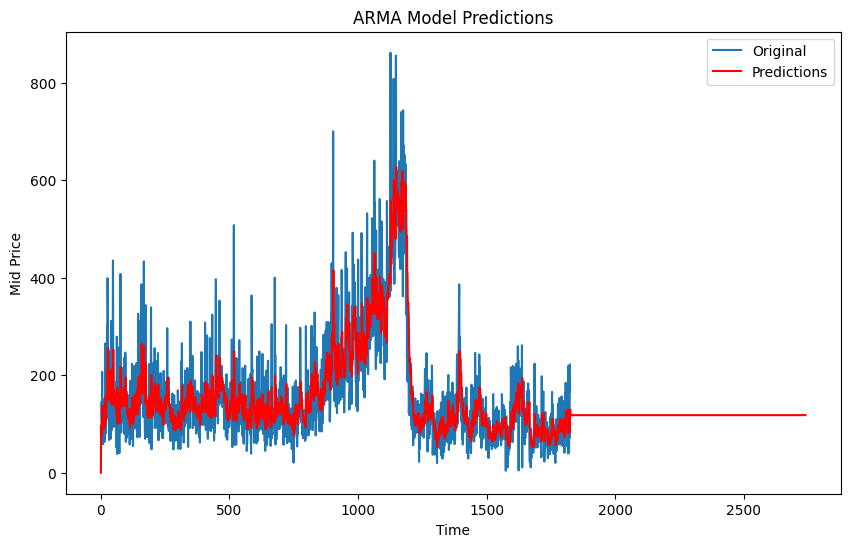

In [6]:
# Plot the figure
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Original')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARMA Model Predictions')
plt.xlabel('Time')
plt.ylabel('Mid Price')
plt.legend()
plt.show()


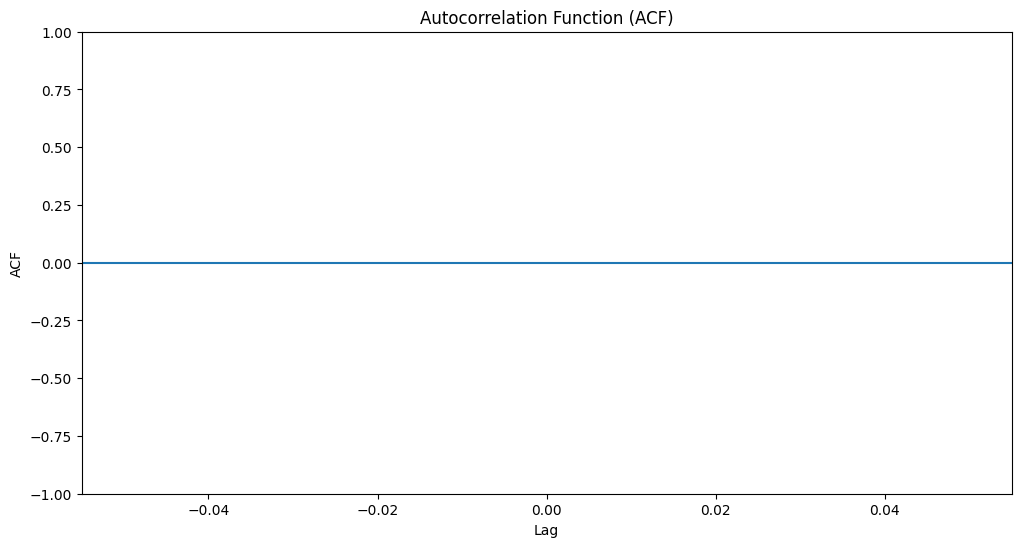

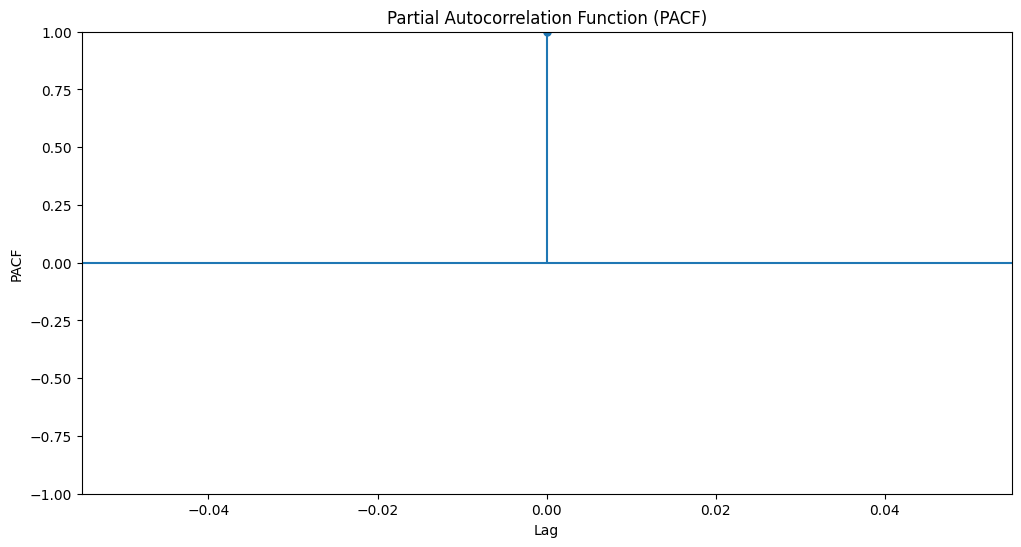

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(time_series, lags=50, ax=ax)
ax.set(title='Autocorrelation Function (ACF)', xlabel='Lag', ylabel='ACF')
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(time_series, lags=50, ax=ax)
ax.set(title='Partial Autocorrelation Function (PACF)', xlabel='Lag', ylabel='PACF')
plt.show()


In [10]:
# Replace missing values with appropriate method (e.g., forward fill, backward fill, mean imputation)
time_series_cleaned = time_series.fillna(method='ffill')

# Perform ADF test on the cleaned time series
result = adfuller(time_series_cleaned)

# Extract and print ADF test results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'    {key}: {value}')

ADF Statistic: -3.113222352376439
p-value: 0.025590024112739685
Critical Values:
    1%: -3.432764423688327
    5%: -2.8626067160580204
    10%: -2.567337848081528


Based on the ADF test results, we can draw the following conclusions:

**ADF Statistic**: The ADF statistic value is -3.113222352376439. This value is less than the critical values at the significance levels of 1%, 5%, and 10%. The ADF statistic being more negative than the critical values suggests that we can reject the null hypothesis of a unit root in the time series. In other words, the time series is likely stationary.

**p-value**: The p-value associated with the ADF statistic is 0.025590024112739685. Since the p-value is less than the significance level of 0.05, we have evidence to reject the null hypothesis. This further supports the notion that the time series is stationary.

**Critical Values**: The critical values represent the threshold values at different significance levels (1%, 5%, and 10%). In this case, the critical values are -3.432764423688327 (1%), -2.8626067160580204 (5%), and -2.567337848081528 (10%). Since the ADF statistic is more negative than these critical values, it provides additional evidence to reject the null hypothesis and suggests the presence of stationarity in the time series.

In summary, based on the ADF test results, we can conclude that the time series is likely stationary. This implies that the series does not exhibit a unit root and has a stable mean and covariance structure, making it suitable for certain time series analysis techniques and modeling approaches.

In [11]:
def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC

        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """

    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(exog, order=order).fit(disp=-1)
        except:
            continue

        aic = model.aic
        results.append([order, model.aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df


In [14]:
from itertools import product

ps = range(0, 8, 1)
d = 1
qs = range(0, 8, 1)

# Create a list with all possible combinations of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)
order_list = []
for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)

# Replace 'data' with your actual dataset or DataFrame
my_dataset = pd.read_excel('/content/drive/MyDrive/Finance project Python/Generic 1st CL future.xlsx')  # Example: Read from an Excel file
exog_variable = my_dataset['Last Price']

result_df = optimize_ARIMA(order_list, exog=exog_variable)
result_df


  0%|          | 0/64 [00:00<?, ?it/s]

,"(p, d, q)",AIC
0,"(2, 1, 5)",11325.908264
1,"(1, 1, 1)",11329.617687
2,"(0, 1, 3)",11330.406411
3,"(0, 1, 2)",11330.435204
4,"(2, 1, 1)",11330.668329
...,...,...
59,"(4, 1, 7)",11345.860219
60,"(1, 1, 0)",11347.079730
61,"(5, 1, 7)",11347.837227
62,"(7, 1, 5)",11347.844436


Once the function is done running, you should see that the order associated with the lowest AIC is (2,1,5). Therefore, this suggests are ARIMA model with an AR(2) process and a MA(5) process.

Now, we can print a summary of the best model, which an ARIMA (2,1,5).

In [15]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have the time series data stored in the variable 'time_series'

# Fit the ARIMA model with (p,d,q) = (2,1,5)
p = 2
d = 1
q = 5
arima_model = ARIMA(time_series, order=(p, d, q))
arima_model_fit = arima_model.fit()

# Print the summary of the ARIMA model
print(arima_model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:              Mid Price   No. Observations:                 2740
Model:                 ARIMA(2, 1, 5)   Log Likelihood              -10221.620
Date:                Tue, 27 Jun 2023   AIC                          20459.241
Time:                        12:09:06   BIC                          20506.563
Sample:                             0   HQIC                         20476.341
                               - 2740                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4305      0.390     -1.105      0.269      -1.194       0.333
ar.L2          0.3023      0.408      0.741      0.459      -0.498       1.102
ma.L1         -0.2469      0.391     -0.631      0.5